Note: This protocol does not use classical communication channels like quantum key distribution (QKD) protocols. It is purely quantum, both in terms of the information packets (quantum states) and the communication channel (entanglement or local Bell's circuit violation implementation).

In [1]:
import cirq
from cirq.contrib.svg import SVGCircuit
from cirq import Simulator
from IPython.display import SVG, display

In [7]:
# function to create a quantum teleportation circuit
def create_teleportation_circuit():
    # Create quantum register
    qubits = cirq.LineQubit.range(3) # 0: Tx, 1: Entangled, 2: Rx
    
    circuit=cirq.Circuit()
    
    # Step 1: Prepare entangled pair between Tx (Alice) and Rx (Bob)
    circuit.append([cirq.H(qubits[1])]) # Hadamard gate for the entangled qubit (Hadamard at Rx)
    circuit.append([cirq.CNOT(qubits[1], qubits[2])]) # CNOT gate between the entangled qubit and Rx
    
    # Step2: Alice sends the quantum state she wants to teleport to the entangled qubit
    circuit.append([cirq.CNOT(qubits[0], qubits[1])]) # CNOT gate between the qubit to be teleported (Tx)
                                                        # and the entangled qubit
    circuit.append([cirq.H(qubits[0])]) # Hadamard gate for the qubit to be teleported (Tx)
    
    # Step 3: Alice measures the qubits to be teleported and entangled qubit
    circuit.append(cirq.measure(qubits[0], qubits[1])) # Measurement at Tx and the entangled qubit
    
    # Step 4: Bob applies X and Z gates based on the measurement results to reconstruct the state
    circuit.append(cirq.CNOT(qubits[1], qubits[2]))  # CNOT gate at the entangled qubit and Rx
    circuit.append(cirq.CZ(qubits[0], qubits[2]))    # CZ gate between the qubit to be teleported (Tx) and Rx

    return circuit

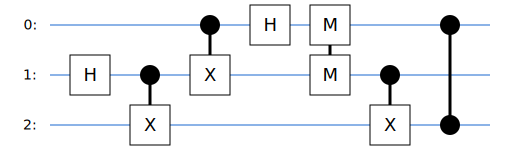

Measurement results:
q(0),q(1)=001111101011011100110111000010000101000100110110001100000101000110110100110011100000110110011100110011000111111011100000011010100101110010001001001011110110101101000110010010100111111110101101001111101001011000111111000010101101101000000001000011101010111001110000110000101100101100000111111100111011100011100111110010101011110011110100110111111111011100101111111001101110110100100110110010011101001001101000001011000001001100000110001011001100010010001100101010100111100000100101011011111110010000011100100001011001110001000001010010110001000110000010101111100101011110001010010010110011010001101111011010000000011001101001010011101000100000101010110111101011011011101010001101000101111010001101100111010001101101101100010001011000011101001011011101001111111001001100011010101011111000100110110100111000101110111000011000001110100000011111010000000100011011111001111111000111011010010101100000111111111101110011110101011011001010001010000000011101001010110111010111111

In [9]:
# Create the teleportation circuit
teleportation_circuit = create_teleportation_circuit()

# Display the circuit in SVG format
svg_circuit = SVGCircuit(teleportation_circuit)  # Create SVGCircuit object
display(svg_circuit)

# Save the circuit diagram as text
with open('exports/teleportation_circuit.txt', 'w', encoding='utf-8') as f:
    f.write(teleportation_circuit.to_text_diagram())

# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.run(teleportation_circuit, repetitions=1000)

# Display the measurement results in text
print("Measurement results:")
print(result)